In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
from keras.models import Model
import numpy as np


In [2]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 18s 19ms/step - loss: 0.1821 - accuracy: 0.9434
Epoch 2/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0472 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0330 - accuracy: 0.9898
Epoch 4/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0248 - accuracy: 0.9926
Epoch 5/5
938/938 [==============================] - 18s 19ms/step - loss: 0.0196 - accuracy: 0.9940


In [6]:

model.evaluate(test_images, test_labels)[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9921


0.9921000003814697

In [7]:
layer = model.layers #Conv layers at 0, 2, 4
layer

In [22]:
filters, biases = model.layers[2].get_weights()
print(layer[2].name, filters.shape)

conv2d_1 (3, 3, 32, 64)


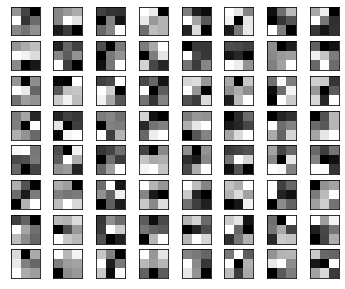

In [23]:
fig1=plt.figure(figsize=(6, 5))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(1, n_filters +1):
    f = filters[:, :, :, i-1]
    fig1 =plt.subplot(rows, columns, i)
    fig1.set_xticks([])  #Turn off axis
    fig1.set_yticks([])
    plt.imshow(f[:, :, 2], cmap='gray') #Show only the filters from 0th channel (R)
    #ix += 1
plt.show()

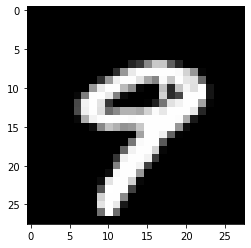

In [10]:
plt.imshow(test_images[9], cmap='gray')

1/1 [==============================] - 0s 75ms/step


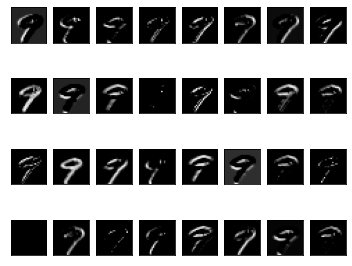

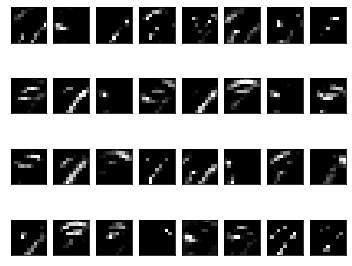

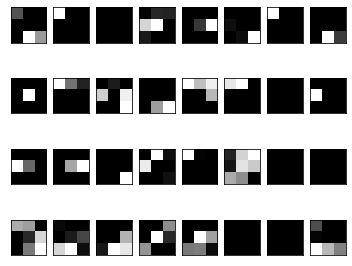

In [11]:
conv_layer_index = [0, 2, 4]  #TO define a shorter model
outputs = [model.layers[i].output for i in conv_layer_index]
model_short = Model(inputs=model.inputs, outputs=outputs)
#print(model_short.summary())

#Input shape to the model is 224 x 224. SO resize input image to this shape.
from tensorflow.keras.utils import load_img
img = test_images[9] #VGG user 224 as input

# expand dimensions to match the shape of model input
img = np.expand_dims(img, axis=0)

# Generate feature output by predicting on the input image
feature_output = model_short.predict(img)


columns = 8
rows = 4
for ftr in feature_output:
    #pos = 1
    fig=plt.figure(figsize=(6, 5))
    for i in range(1, columns*rows +1):
        fig =plt.subplot(rows, columns, i)
        fig.set_xticks([])  #Turn off axis
        fig.set_yticks([])
        plt.imshow(ftr[0, :, :, i-1], cmap='gray')
        #pos += 1
    plt.show()

In [12]:
ftr.shape

(1, 3, 3, 64)